# Multiple Linear Regression
## 자전거 공유 assignment

#### Problem Statement:

자전거 공유 시스템은 자전거를 단기적으로 개인에게 가격이나 무료로 공유할 수 있도록 하는 서비스입니다. 많은 자전거 공유 시스템은 사용자가 결제 정보를 입력하고 시스템이 잠금을 해제하는 일반적으로 컴퓨터로 제어되는 "도크"에서 자전거를 빌릴 수 있도록 합니다. 이 자전거는 이후 동일한 시스템에 속한 다른 도크로 반환될 수 있습니다.


미국의 자전거 공유 업체 바이크 인디아는 최근 코로나 팬데믹이 지속되면서 수익이 크게 감소했습니다. 이 회사는 현재 시장 시나리오에서 지속하기가 매우 어렵다고 판단하고 있습니다. 따라서 현재 진행 중인 봉쇄가 끝나고 경제가 건강한 상태로 회복되는 즉시 수익을 가속화할 수 있도록 염두에 둔 사업 계획을 마련하기로 결정했습니다.


이러한 시도에서 **바이크인디아**는 코로나19로 인해 전국적으로 진행 중인 방역 상황이 종료된 후 사람들 사이의 공유 자전거 수요를 이해하기를 열망합니다. 그들은 상황이 전반적으로 나아지고 다른 서비스 제공업체들과 두각을 나타내고 막대한 수익을 올릴 수 있는 상황이 되면 사람들의 요구에 부응하기 위해 이를 계획했습니다.


그들은 이러한 공유 자전거의 수요가 의존하는 요인을 이해하기 위해 컨설팅 회사와 계약했습니다. 구체적으로, 그들은 미국 시장에서 이러한 공유 자전거의 수요에 영향을 미치는 요인을 이해하기를 원합니다. 그 회사는 다음을 알고 싶어합니다:

공유 자전거의 수요를 예측하는 데 중요한 변수는 무엇입니까.
이 변수들이 자전거 요구를 얼마나 잘 설명하는지를 보여줍니다
다양한 기상 조사와 사람들의 스타일을 기반으로 서비스 제공업체는 일부 요인을 기반으로 미국 시장 전반의 일상적인 자전거 수요에 대한 대규모 데이터 세트를 수집했습니다.

#### Business Goal:

우리는 사용 가능한 독립 변수를 사용하여 공유 자전거에 대한 수요를 모델링해야 합니다. 이는 경영진이 수요가 다양한 기능으로 정확히 어떻게 변화하는지 이해하는 데 사용될 것입니다. 그들은 수요 수준을 충족하고 고객의 기대를 충족시키기 위해 비즈니스 전략을 적절히 조작할 수 있습니다. 또한, 이 모델은 경영진이 새로운 시장의 수요 역학을 이해하는 좋은 방법이 될 것입니다.

##  데이터불러오기


In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
bike = pd.DataFrame(pd.read_csv("day.csv"))

In [4]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Check the descriptive information
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Check the shape of df

print(bike.shape)

(730, 16)


## Finding : 
데이터 세트에는 730개의 행과 16개의 열이 있습니다.

dteday 열을 제외한 나머지 열은 모두 float 또는 integer 형식입니다.

dteday 열은 날짜 유형입니다.

데이터를 보면 범주형이지만 integer/float type인 필드가 있는 것 같습니다.

범주형으로 변환할 것인지 정수로 처리할 것인지 분석하고 최종 결정할 것입니다.

# DATA QUALITY CHECK

## 결측값 확인

- 각 열에 대한 결측값의 비율을 계산해서 내림차순으로 정렬

In [7]:
# percentage of missing values in each column
# round 메소드는 계산한 결측값의 비율을 소수점 둘째 자리까지 반올림한다.
round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

- 각 행별로 결측값의 비율을 계산하고 내림차순으로 정렬

In [8]:
# row-wise null count percentage
round((bike.isnull().sum(axis=1)/len(bike))*100,2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

## Finding
열 또는 행에서 결측값이 없습니다.

## 중복 확인

In [9]:
bike_dup = bike.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)

In [10]:
bike_dup.shape

(730, 16)

In [11]:
bike.shape

(730, 16)

### Insights 

drop duplicate 명령을 실행한 후의 모양이 원래 데이터 프레임과 동일합니다.

따라서 데이터 세트에 중복 값이 없다고 결론 내릴 수 있습니다.

## 데이터 전처리

Checking value_counts() for entire dataframe. 

This will help to identify any Unknow/Junk values present in the dataset.

In [13]:
# 'instant' 열을 제외한 모든 열을 포함하는 새로운 데이터프레임인 'bike_dummy'를 생성
bike_dummy=bike.iloc[:,1:16]

In [14]:
#  'bike_dummy'의 각 열에 대해 고유한 값의 개수를 내림차순으로 출력하는 반복문
# 코드를 실행하면 데이터프레임의 각 열에 대한 고유 값의 개수가 출력
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=False), '\n\n\n')

dteday
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: count, Length: 730, dtype: int64 



season
3    188
2    184
1    180
4    178
Name: count, dtype: int64 



yr
0    365
1    365
Name: count, dtype: int64 



mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64 



holiday
0    709
1     21
Name: count, dtype: int64 



weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64 



workingday
1    499
0    231
Name: count, dtype: int64 



weathersit
1    463
2    246
3     21
Name: count, dtype: int64 



temp
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: count, Length: 498, dtype: int64 



atemp
32.7

### Insights 
전체 데이터에서 junk/unknown값이 없어보임

# 중복 및 원하지 않는 열 제거

데이터 및 데이터 사전의 상위 수준을 기준으로 다음 변수를 추가 분석에서 제거할 수 있다. 즉 굳이 필요 하지 않은 열은 제거할 수 있음.

1. **instant** : 인덱스 값

2. **dteday** : 날짜가 있습니다. 이미 '연도'와 '월'에 대한 별도의 열이 있기 때문에 이 열을 사용하지 않아도 됩니다. 
3.  **casual & registered** : 이 두 열에는 다양한 범주의 고객이 예약한 자전거 수가 포함되어 있습니다.
우리의 목표는 특정 범주가 아닌 자전거의 총 수를 찾는 것이기 때문에, 우리는 이 두 열을 무시할 것입니다.
또한 이러한 고객 유형의 비율을 갖도록 새로운 변수를 만들었습니다.

4. 새로운 데이터 프레임을 bike_new로 저장하여 원본 데이터 세트가 향후 분석/검증을 위해 보존되도록 할 것입니다

In [15]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [16]:
# 필요없는 열을 지워서 새로운 데이터프레임 bike_new 만듦
bike_new=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]


In [17]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


# Creating Dummy Variables


- 'mnth', 'weekday', 'season' , 'weathersit' 이 네 가지 범주형 변수를 가지고 Dummy Variables를 만들 것이다. 
- 이 칼럼들은 숫자로 이루어지긴 했지만 대소관계를 나타내는 수치형 데이터는 아님
- 더미 변수 만들기 전에 우리는 이것들을 범주형 데이터 타입으로 만들어야 한다. 


In [18]:
# Check the datatypes before convertion
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [19]:
# Convert to 'category' data type

bike_new['season']=bike_new['season'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')
bike_new['mnth']=bike_new['mnth'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')


In [20]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [21]:
# pd.get_dummies: 더미 변수 생성
# 더미가 생성된 원래의 변수들을 drop
# drop_first=True : 생성된 각 더미 세트의 첫 번째 더미 변수를 drop, 다중공선성을 피하기 위해

bike_new = pd.get_dummies(bike_new, drop_first=True)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    bool   
 9   season_3      730 non-null    bool   
 10  season_4      730 non-null    bool   
 11  mnth_2        730 non-null    bool   
 12  mnth_3        730 non-null    bool   
 13  mnth_4        730 non-null    bool   
 14  mnth_5        730 non-null    bool   
 15  mnth_6        730 non-null    bool   
 16  mnth_7        730 non-null    bool   
 17  mnth_8        730 non-null    bool   
 18  mnth_9        730 non-null    

In [22]:
bike_new.shape

(730, 30)

## 데이터분할
- 훈련데이터와 검증 데이터로 분할: (70:30 비율)
- 이를 위해 sklearn 패키지의 train_test_split 메서드를 사용합니다

In [23]:
# Check the shape before spliting

bike_new.shape

(730, 30)

In [24]:
# Check the info before spliting

bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    bool   
 9   season_3      730 non-null    bool   
 10  season_4      730 non-null    bool   
 11  mnth_2        730 non-null    bool   
 12  mnth_3        730 non-null    bool   
 13  mnth_4        730 non-null    bool   
 14  mnth_5        730 non-null    bool   
 15  mnth_6        730 non-null    bool   
 16  mnth_7        730 non-null    bool   
 17  mnth_8        730 non-null    bool   
 18  mnth_9        730 non-null    

In [25]:
from sklearn.model_selection import train_test_split

# train data set고 test data set가 항상 같은 행을 갖도록 'random_state'를 지정해야 합니다. 
np.random.seed(0) # 실행 시  난수 생성 과정이 초기화되며, 동일한 시드를 사용하면 항상 같은 난수가 생성.
#random_state를 특정 숫자로 설정하면 해당 숫자를 시드로 사용하여 난수를 생성,
df_train, df_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 333)


- Verify the info and shape of the dataframes after split:

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    bool   
 9   season_3      510 non-null    bool   
 10  season_4      510 non-null    bool   
 11  mnth_2        510 non-null    bool   
 12  mnth_3        510 non-null    bool   
 13  mnth_4        510 non-null    bool   
 14  mnth_5        510 non-null    bool   
 15  mnth_6        510 non-null    bool   
 16  mnth_7        510 non-null    bool   
 17  mnth_8        510 non-null    bool   
 18  mnth_9        510 non-null    boo

In [27]:
df_train.shape

(510, 30)

In [28]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   season_2      219 non-null    bool   
 9   season_3      219 non-null    bool   
 10  season_4      219 non-null    bool   
 11  mnth_2        219 non-null    bool   
 12  mnth_3        219 non-null    bool   
 13  mnth_4        219 non-null    bool   
 14  mnth_5        219 non-null    bool   
 15  mnth_6        219 non-null    bool   
 16  mnth_7        219 non-null    bool   
 17  mnth_8        219 non-null    bool   
 18  mnth_9        219 non-null    bool

In [29]:
df_test.shape

(219, 30)

# EXPLORATORY DATA ANALYSIS(EDA)


- We need to  perform the EDA on TRAINING (df_train) Dataset.

## 숫자 변수 시각화
모든 숫자 변수의 쌍 그림을 만들어 보겠습니다.

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    bool   
 9   season_3      510 non-null    bool   
 10  season_4      510 non-null    bool   
 11  mnth_2        510 non-null    bool   
 12  mnth_3        510 non-null    bool   
 13  mnth_4        510 non-null    bool   
 14  mnth_5        510 non-null    bool   
 15  mnth_6        510 non-null    bool   
 16  mnth_7        510 non-null    bool   
 17  mnth_8        510 non-null    bool   
 18  mnth_9        510 non-null    boo

In [32]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

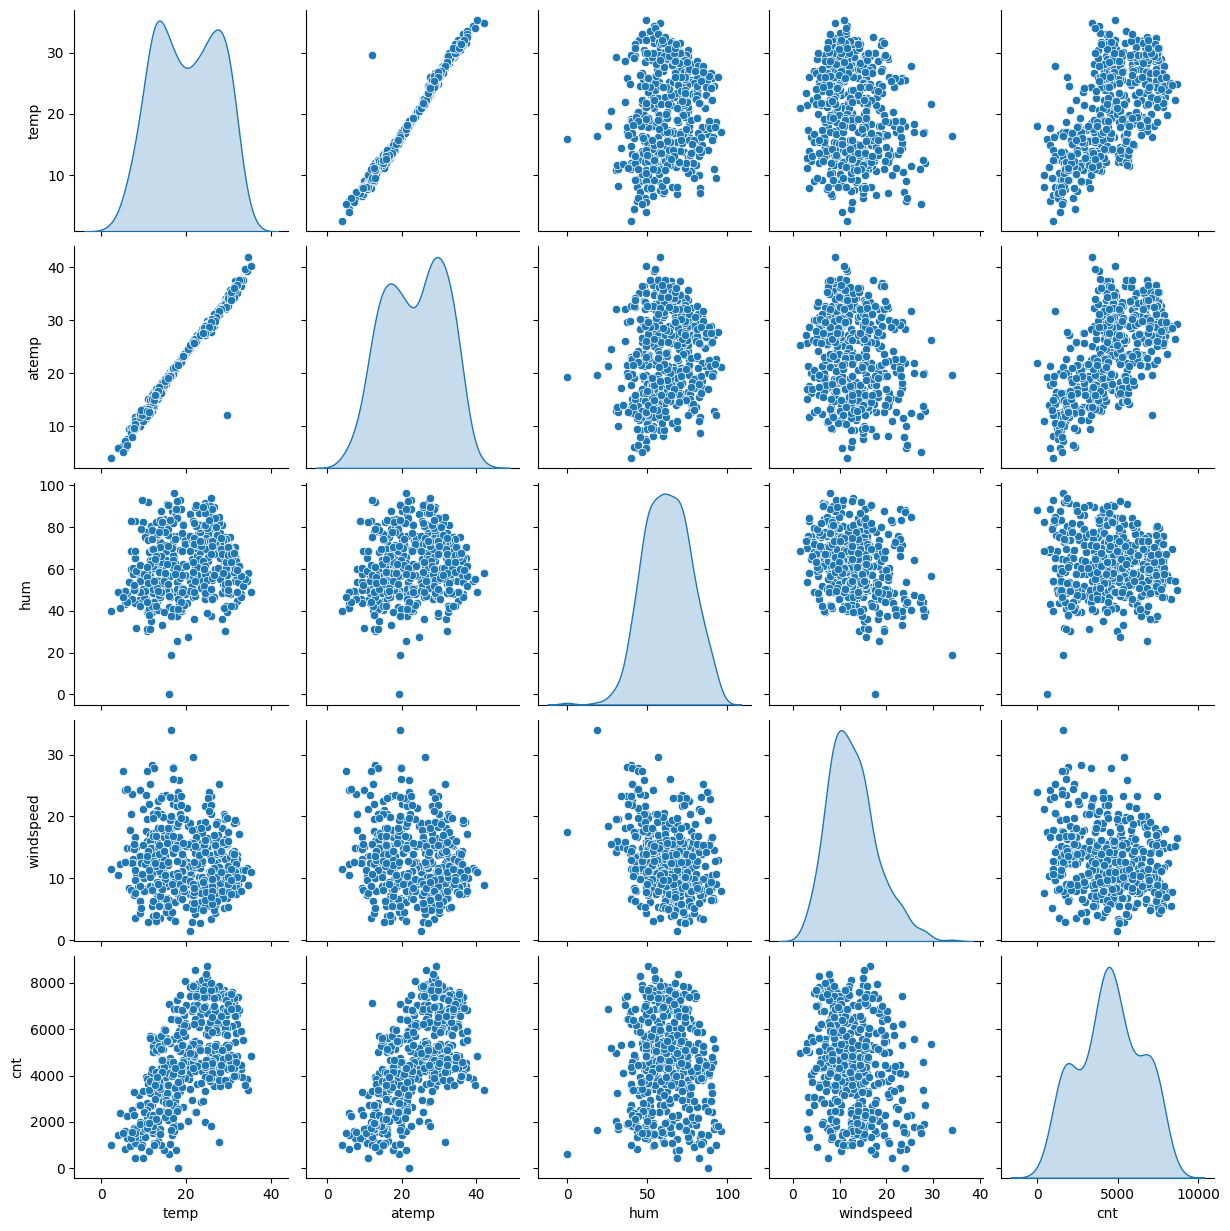

In [33]:
# 숫자형 변수만을 사용하여 새로운 데이터프레임 제작
bike_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

### Insights
- 위의 쌍 그림은 'temp', 'atemp'와 'cnt' 사이에 선형 관계가 있음을 나타냅니다
- temp는 섭씨 온도, atemp는 체감 온도, cnt: 총 라이더 수 (일반 라이더와 등록된 라이더 수의 합)

## 범주형 변수 시각화

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

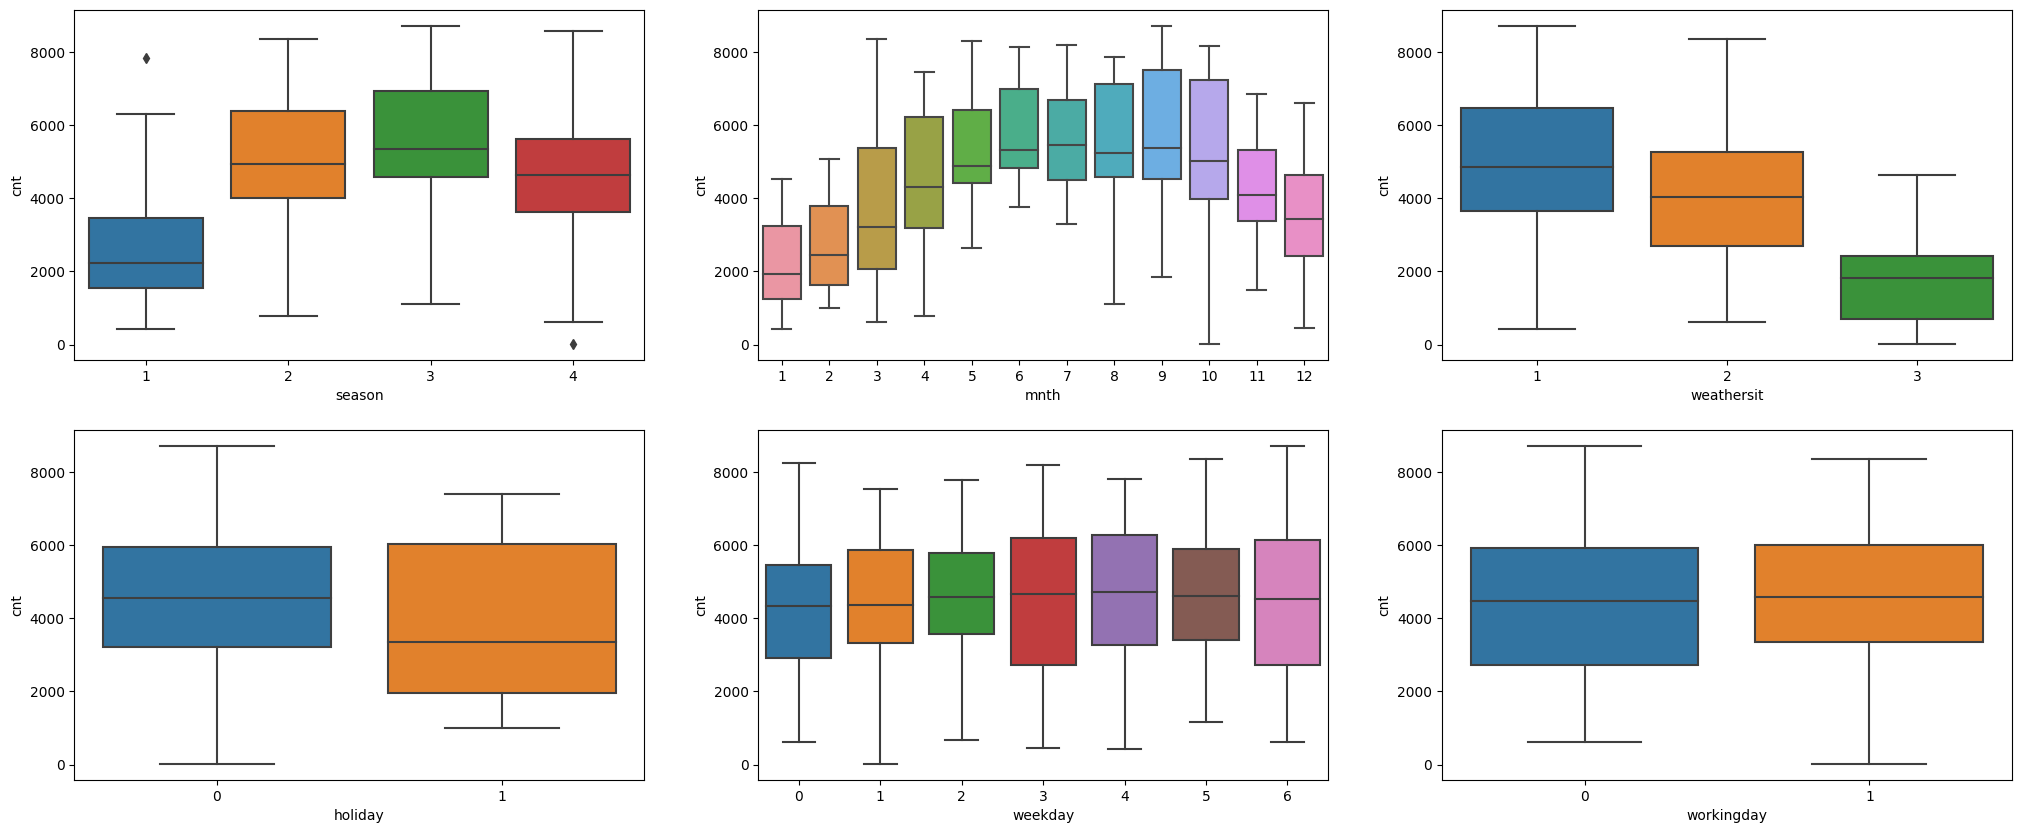

In [34]:
# target 변수 'cnt'에 대한 모든 범주형 변수(더미변수 만들기 전)의 boxplot 시각화
# 각 예측 변수가 target 변수에 어떻게 누적되는지 확인

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

### Insights
데이터 세트에는 6개의 범주형 변수가 있습니다.

'Box plot'(위 그림 참조)을 사용하여 종속 변수('cnt')에 미치는 영향을 연구했습니다.

우리가 도출할 수 있는 추론은 다음과 같습니다:
- **season**: 자전거 예약의 거의 32%가 시즌 3에서 발생했으며 예약의 중앙값은 5000건 이상(2년 동안)이었습니다. 시즌 2 & 시즌 4가 전체 예약의 27%와 25%로 그 뒤를 이었습니다. 이는 시즌이 종속 변수(cnt)에 대한 좋은 예측 변수가 될 수 있음을 나타냅니다.

- **mnth**: 자전거 예약의 거의 10%가 5,6,7,8 및 9월 동안 발생했으며 이 기간에 월 평균 예약은 4000건 이상이었습니다. 이는 mnth가 예약에 대한 일부 추세가 있으며 종속 변수에 대한 좋은 예측 변수가 될 수 있음을 나타냅니다.
- **weathersit**: 자전거 예약의 거의 67%가 'weathersit1' 동안 발생했으며 중앙값은 5000회에 가까웠습니다(2년 동안). 이는 전체 예약의 30%를 차지하는 weathersit2가 그 뒤를 이었습니다. 이는 날씨가 자전거 예약에 대한 일부 추세를 보여주는 것이 종속 변수의 좋은 예측 변수가 될 수 있음을 나타냅니다.
- **holiday**: 자전거 예약의 거의 97.6%가 휴일이 아닐 때 발생했는데, 이는 이 데이터가 분명히 편향되어 있음을 의미합니다. 이는 휴일이 종속 변수에 대한 좋은 예측 변수가 될 수 없음을 나타냅니다.
- **weekday**: 평일 변수는 독립적인 중앙값이 4000-5000회 사이로 매우 비슷한 추세(주중 모든 요일의 총 예약의 13.5%-14.8% 사이)를 보여줍니다. 이 변수는 예측 변수에 일부 영향을 미치거나 전혀 영향을 미치지 않을 수 있습니다. 모델이 이것을 추가해야 하는지 여부를 결정하도록 하겠습니다.
- **workingday**: 자전거 예약의 거의 69%가 중앙값 5000 (2년 동안)으로 'workingday(근무일)'에 발생했습니다. 이는 근무일이 종속 변수에 대한 좋은 예측 변수가 될 수 있음을 나타냅니다

## Correlation Matrix

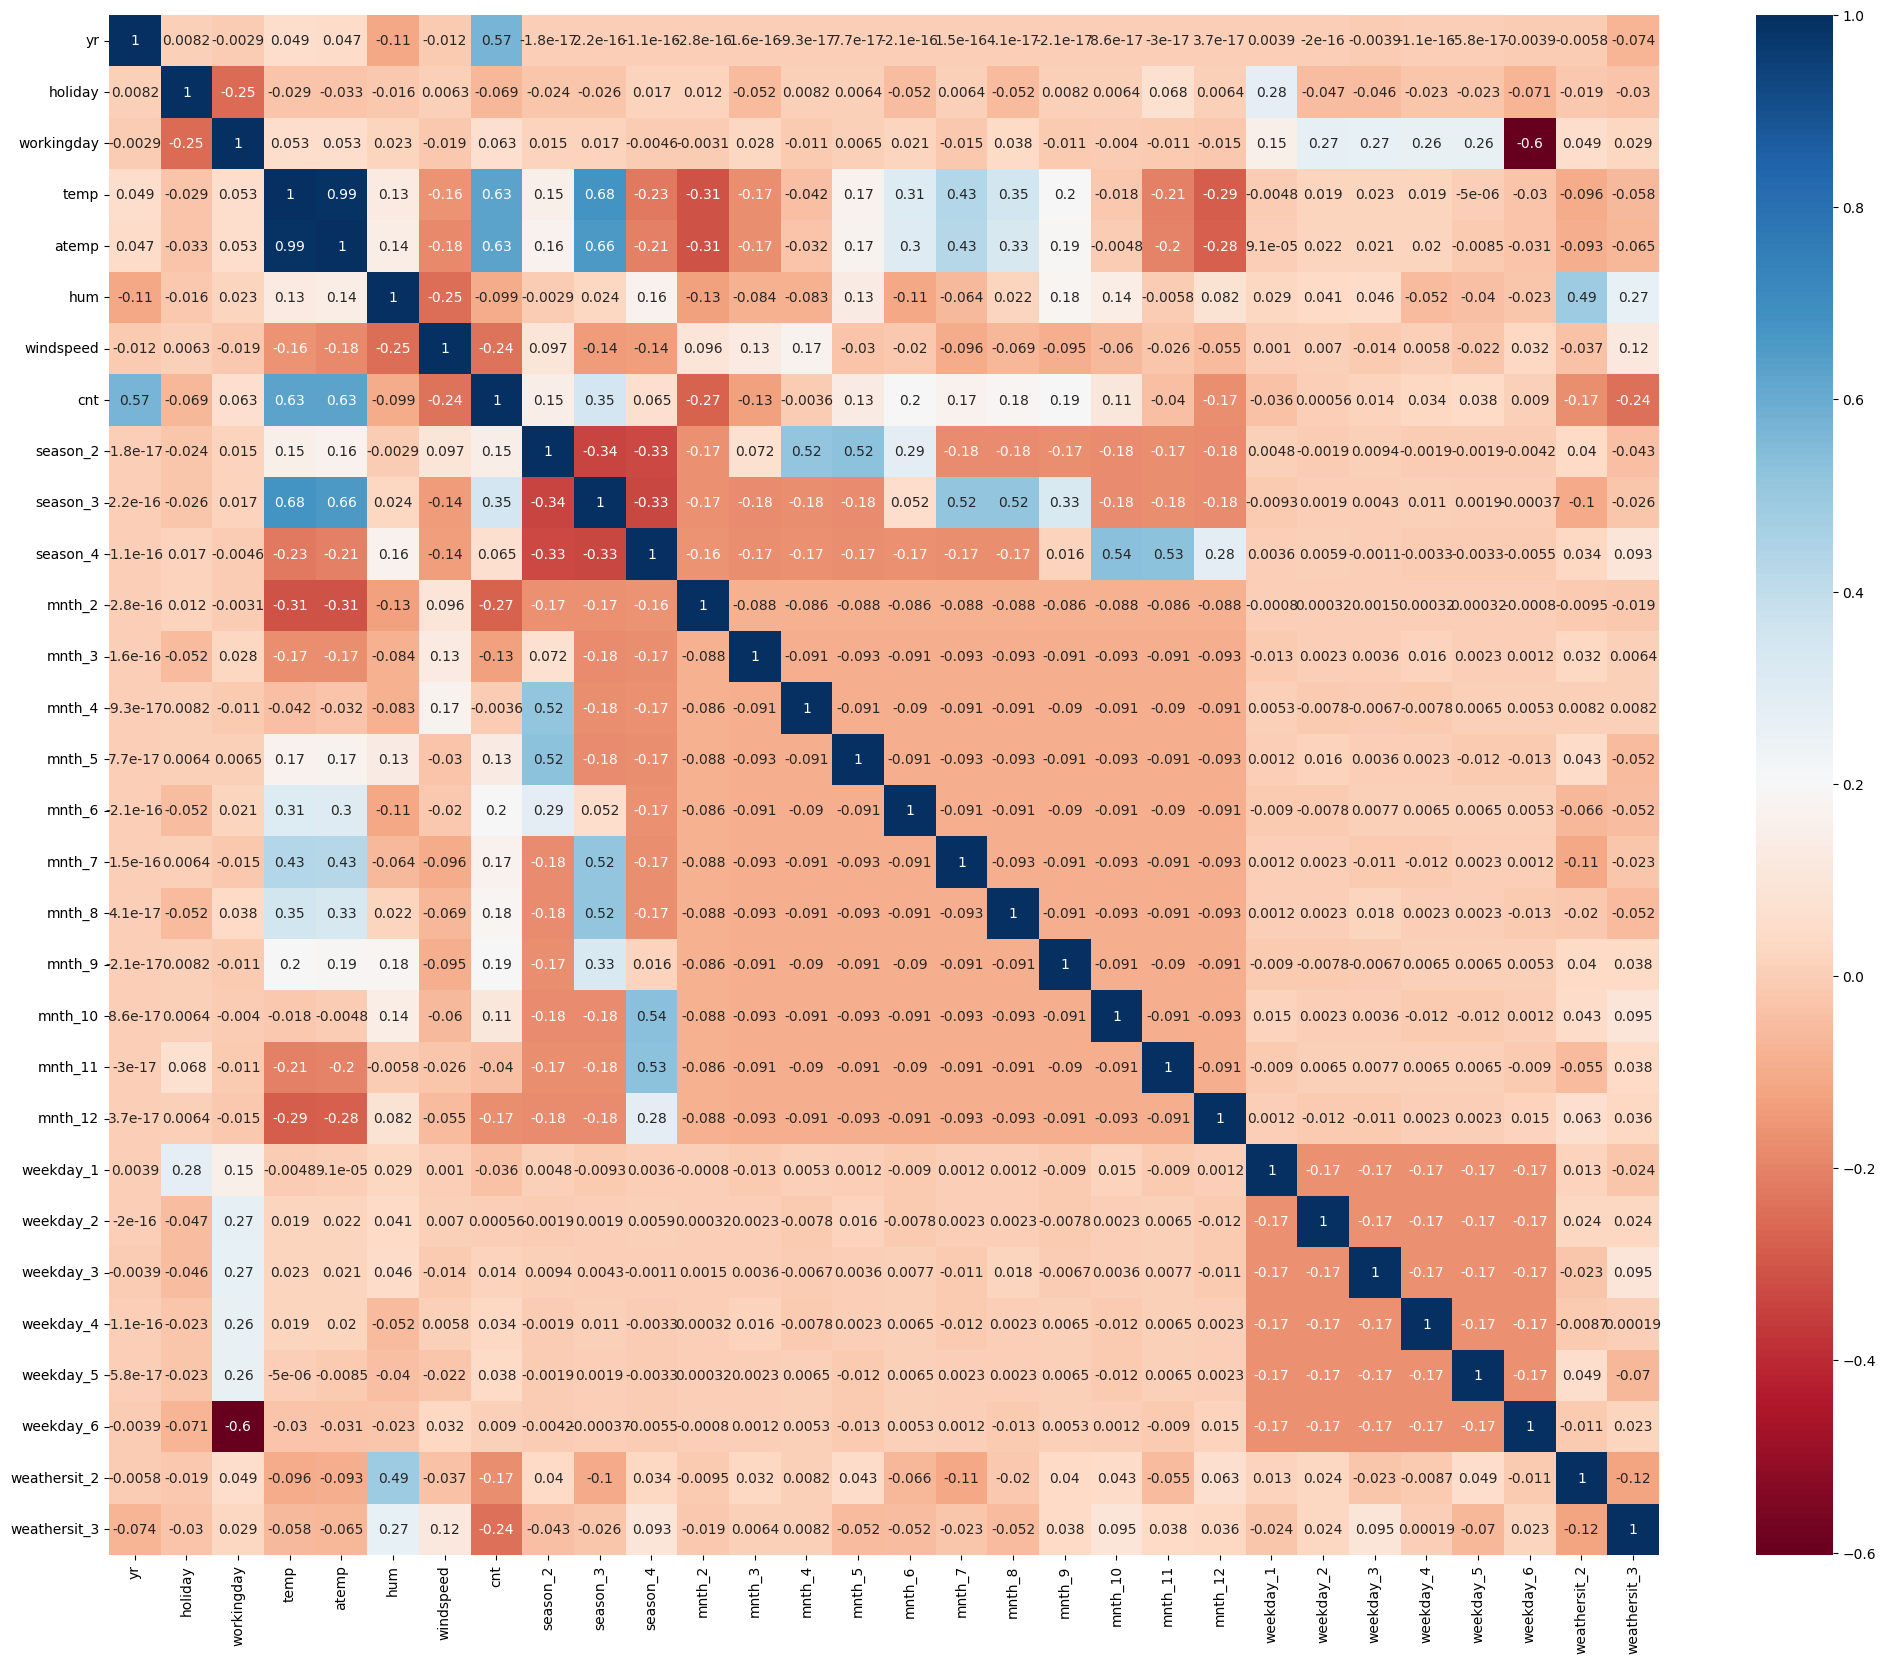

In [35]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(bike_new.corr(), annot = True, cmap="RdBu")
plt.show()

### Insights:
 - heatmap 특성상 상관관계가 높은 변수들을 보여주는 것 뿐만 아니라 다중공선성이 높은 변수들까지 보여줌.
 - 선형 모델을 구축하는 동안 이 맵을 앞뒤로 참조하여 VIF 및 p-value와 함께 서로 다른 상관 값을 검증하여 모델에서 선택/제거할 올바른 변수를 식별합니다.

# RESCALING THE FEATURES

In [36]:
# MinMaxScaler를 사용하여 모든 feature들을 동일한 스케일로 조정, 
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [38]:
# Checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,18.791653,22.50605,58.7083,7.832836,6304,True,False,...,False,False,False,False,False,False,False,False,False,False
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,False,False,...,False,False,False,False,False,False,False,True,False,False
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,False,True,...,False,False,True,False,False,False,False,False,False,False
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,False,False,...,False,True,False,False,False,False,False,False,True,False
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [42]:
# 수치형 변수들은 MinMaxScaler를 사용하여 스케일링하는 작업 수행
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [43]:
# Checking values after scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,True,False,...,False,False,False,False,False,False,False,False,False,False
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,False,False,...,False,False,False,False,False,False,False,True,False,False
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,False,True,...,False,False,True,False,False,False,False,False,False,False
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,False,False,...,False,True,False,False,False,False,False,False,True,False
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,0.540901,0.515631,0.647390,0.346318,0.515144
std,0.500487,0.151726,0.466018,0.227898,0.213626,0.149722,0.160266,0.224281
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 선형 모델 구축

## Dividing into X and Y sets for the model building

In [45]:
# 'cnt'열을 데이터프레임에서 분리하고 해당 열으 값을 반환. cnt값은 종속 변수로 사용될 것임
y_train = df_train.pop('cnt')
X_train = df_train # X_train은 cnt열을 제외한 모든 열을 포함. 

### RFE
재귀적 기능 제거: RFE(sklearn의 유틸리티인)와의 호환성을 위해 SciKit Learn**의 *선형 회귀 함수를 사용할 예정입니다

In [57]:
# Importing RFE and LinearRegression
# RFE: 반복적으로 피쳐들을 제거하면서 모델의 성능을 평가, 성능이 가장 떨어지는 feature을 제거하여 최종적으로 중요한 피쳐들을 선택 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [58]:
# 선형회기 모델 학습하고 RFE  사용하여 가장 중요한 피쳐들을 선택하는 코드
lm = LinearRegression() # 선형회귀 모델 생성, 'lm' 객체는 선형회귀 모델을 나타냄
lm.fit(X_train, y_train) # 선형 회귀 모델을 학습

rfe = RFE(estimator=lm, n_features_to_select=15)  # estimator와 n_features_to_select 설정
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [59]:
# RFE 를 통해 선택된 특성들과 그 선택여부, 그리고 랭킹 정보를 리스트로 출력
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 15),
 ('mnth_3', False, 8),
 ('mnth_4', False, 12),
 ('mnth_5', False, 13),
 ('mnth_6', False, 9),
 ('mnth_7', False, 2),
 ('mnth_8', False, 3),
 ('mnth_9', False, 14),
 ('mnth_10', False, 11),
 ('mnth_11', False, 5),
 ('mnth_12', False, 6),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 4),
 ('weathersit_2', False, 7),
 ('weathersit_3', True, 1)]

- rfe.support_: 선택된 특성들을 나타내는 불리언(True/False) 배열입니다. 선택된 특성은 True로 표시되고, 선택되지 않은 특성은 False로 표시됩니다. 
- rfe.ranking_: 각 특성의 랭킹을 나타내는 배열입니다. 숫자가 낮을수록 더 중요한 특성으로 간주됩니다.

In [60]:
# 선택된 피쳐들의 열 이름 추출
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weathersit_3'],
      dtype='object')

In [61]:
# 선택되지 못한 피쳐들의 열 이름 추출
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_6',
       'weathersit_2'],
      dtype='object')

In [62]:
# Creating X_test dataframe with RFE selected variables
#  RFE 를 통해 선택된 특성들로 이루어진 col 변수를 사용하여X_train에서 선택된 특성들만으로 이루어진 X_train_rfe 데이터프레임을 생성
X_train_rfe = X_train[col]

# 'STATS MODEL'을 사용하여 선형 모델 구축

## Model 1

### VIF Check

In [65]:
pip install statsmodels


     ---------------------------------------- 9.2/9.2 MB 8.3 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 4.8 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor #다중공선성 평가

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [68]:
# 회귀 모델 학습
import statsmodels.api as sm

# Add a constant
# 상수항을 추가한 새로운 설명변수 데이터프레임 X_train_lm1 만듦. 
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
# Check the parameters obtained
# 'lr1'의 회귀계수를 나타냄. 
lr1.params

In [52]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Mon, 25 Sep 2023   Prob (F-statistic):          1.28e-186
Time:                        15:45:04   Log-Likelihood:                 509.26
No. Observations:                 510   AIC:                            -986.5
Df Residuals:                     494   BIC:                            -918.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1953      0.030      6.576   

## Model 2

- High p-value 및 High VIF를 기반으로 'atemp' 변수 제거


In [69]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

KeyError: "['atemp'] not found in axis"

### VIF Check

In [70]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

NameError: name 'X_train_new' is not defined

In [71]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

NameError: name 'X_train_new' is not defined

In [72]:
# Check the parameters obtained

lr2.params

NameError: name 'lr2' is not defined

In [73]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

NameError: name 'lr2' is not defined

## Model 3

- 매우 높은 'VIF' 값을 기준으로 변수 'hum'을 제거합니다.
- 'hum'의 VIF가 두 번째로 높긴 하지만, 우리는 온도가 자전거 대여와 같은 사업에 중요한 요소가 될 수 있다는 일반적인 지식을 바탕으로 'temp'가 아닌 'hum'를 떨어뜨리기로 결정했고, 'temp'를 유지하기를 원했습니다.

In [74]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

NameError: name 'X_train_new' is not defined

### VIF Check

In [75]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

NameError: name 'X_train_new' is not defined

In [76]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

NameError: name 'X_train_new' is not defined

In [77]:
lr3.params

NameError: name 'lr3' is not defined

In [78]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

NameError: name 'lr3' is not defined

## Model 4

- 매우 높은 'VIF' 값을 기준으로 'season3' 변수 제거.
- season3의 VIF가 두 번째로 높지만, 온도가 자전거 대여와 같은 사업에 중요한 요소가 될 수 있다는 일반적인 지식을 바탕으로 'temp'가 아닌 'season3'를 내리기로 결정하고 'temp'를 유지하기를 원했습니다.

In [79]:
X_train_new = X_train_new.drop(["season_3"], axis = 1)

NameError: name 'X_train_new' is not defined

### VIF Check

In [64]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.92
3,windspeed,4.15
1,workingday,4.07
0,yr,2.01
5,season_4,1.98
9,weekday_6,1.66
8,mnth_10,1.63
4,season_2,1.56
10,weathersit_2,1.54
7,mnth_9,1.23


In [65]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [66]:
# Check the parameters obtained

lr4.params

const           0.076726
yr              0.231340
workingday      0.042231
temp            0.568327
windspeed      -0.153306
season_2        0.083704
season_4        0.119733
mnth_3          0.044132
mnth_9          0.102838
mnth_10         0.041927
weekday_6       0.056942
weathersit_2   -0.077340
weathersit_3   -0.316638
dtype: float64

In [67]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     200.2
Date:                Mon, 25 Sep 2023   Prob (F-statistic):          1.56e-181
Time:                        15:45:14   Log-Likelihood:                 488.92
No. Observations:                 510   AIC:                            -951.8
Df Residuals:                     497   BIC:                            -896.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0767      0.020      3.775   

## Model 5

변수 'mnth_10'을(를) 매우 높은 p-값을 기준으로 제거하는 중입니다.


In [68]:
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

### VIF Check

In [69]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.80
3,windspeed,4.11
1,workingday,4.07
0,yr,2.00
8,weekday_6,1.66
4,season_2,1.56
9,weathersit_2,1.53
5,season_4,1.41
7,mnth_9,1.20
6,mnth_3,1.15


In [70]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [71]:
# Check the parameters obtained

lr5.params

const           0.074194
yr              0.230191
workingday      0.042294
temp            0.575607
windspeed      -0.156154
season_2        0.082553
season_4        0.134820
mnth_3          0.044834
mnth_9          0.096439
weekday_6       0.057422
weathersit_2   -0.075711
weathersit_3   -0.311216
dtype: float64

In [72]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.0
Date:                Mon, 25 Sep 2023   Prob (F-statistic):          1.39e-181
Time:                        15:45:17   Log-Likelihood:                 486.24
No. Observations:                 510   AIC:                            -948.5
Df Residuals:                     498   BIC:                            -897.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0742      0.020      3.640   

## Model 6

- 높은 'p-값'을 기준으로 'mnth_3' 변수를 제거하는 중입니다.

In [73]:
X_train_new = X_train_new.drop(["mnth_3"], axis = 1)

### VIF Check

In [74]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.72
3,windspeed,4.02
1,workingday,4.01
0,yr,2.00
7,weekday_6,1.65
4,season_2,1.56
8,weathersit_2,1.52
5,season_4,1.38
6,mnth_9,1.20
9,weathersit_3,1.07


In [75]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [76]:
# Check the parameters obtained

lr6.params

const           0.084143
yr              0.230846
workingday      0.043203
temp            0.563615
windspeed      -0.155191
season_2        0.082706
season_4        0.128744
mnth_9          0.094743
weekday_6       0.056909
weathersit_2   -0.074807
weathersit_3   -0.306992
dtype: float64

In [77]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     233.8
Date:                Mon, 25 Sep 2023   Prob (F-statistic):          3.77e-181
Time:                        15:45:20   Log-Likelihood:                 482.39
No. Observations:                 510   AIC:                            -942.8
Df Residuals:                     499   BIC:                            -896.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0841      0.020      4.168   

### Insights
- 예측 변수와 모든 예측 변수의 p-값 사이에 매우 낮은 다중 공선성이 유의한 것으로 보이기 때문에 이 모형은 양호해 보입니다. 

# 최종 모델 해석

## 가설 검정:

Hypothesis testing states that:
- H0:B1=B2=...=Bn=0 
- H1:  at least one  Bi!=0

### lr6 모형 계수 값

- const 0.084143
- yr 0.230846
- workingday 0.043203
- temp 0.563615
- windspeed -0.155191
- season_2 0.082706
- season_4 0.128744
- mnth_9 0.094743
- weekday_6 0.056909
- weathersit_2 -0.074807
- weathersit_3 -0.306992

### 실습(개념이해)1

### Insights
- lr6 모델 요약에서 모든 계수가 0과 같지 않다는 것은 귀무가설을 기각하는 것을 의미합니다
    

### F Statistics

F-통계는 모형의 전반적인 유의성을 검정하는 데 사용됩니다. F-통계가 높을수록 모형의 유의성이 높아집니다.

- F-statistic: 233.8
- Prob (F-statistic): 3.77e-181

F-통계값 233(1보다 큼)과 p-값 '~0.0000'은 전체 모형이 유의하다는 것을 나타냅니다

## The equation of best fitted surface based on model lr6:

cnt = 0.084143 + (**yr** × 0.230846) + (**workingday** × 0.043203) + (**temp** × 0.563615) − (**windspeed** × 0.155191) + (**season2** × 0.082706) + (**season4** ×0.128744) + (**mnth9** × 0.094743) + (**weekday6** ×0.056909) − (**weathersit2** × 0.074807) − (**weathersit3** × 0.306992)

## 상관계수 해석:
**temp:** A coefficient value of ‘0.5636’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.5636 units.

**weathersit_3:** A coefficient value of ‘-0.3070’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable, decreases the bike hire numbers by 0.3070 units.

**yr:** A coefficient value of ‘0.2308’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.2308 units.

**season_4:**  A coefficient value of ‘0.128744’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.128744 units.

**windspeed:** A coefficient value of ‘-0.155191’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.155191 units.

**workingday:** A coefficient value of ‘0.043203’ indicated that, a unit increase in workingday variable increases the bike hire numbers by 0.043203 units.

**season_2:** A coefficient value of ‘0.082706’ indicated that w.r.t season_1, a unit increase in season_2 variable decreases the bike hire numbers by 0.082706 units.

**mnth_9:** A coefficient value of ‘0.094743’ indicated that w.r.t mnth_1, a unit increase in mnth_9 variable increases the bike hire numbers by 0.094743 units.

**weekday_6:** A coefficient value of ‘0.056909’ indicated that w.r.t weekday_1, a unit increase in weekday_6 variable increases the bike hire numbers by 0.056909 units.

**weathersit_2:** A coefficient value of ‘-0.074807’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit2 variable, decreases the bike hire numbers by 0.074807 units.

**const:** '0.084143'의 상수 값은 다른 모든 예측 변수가 없는 경우(즉, x1,x2...xn =0인 경우)에도 자전거 대여가 여전히 0.084143단위 증가할 수 있음을 나타냅니다.

# 가정

## 오차항은 일반적으로 평균 0(X, Y가 아님)으로 분포됩니다
- train 데이터 잔차 분석

In [78]:
# 형 회귀 모델인 lr6을 사용하여 훈련 데이터셋인 X_train_lm6에서 예측을 수행하고, 예측값을 y_train_pred 변수에 저장
y_train_pred = lr6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

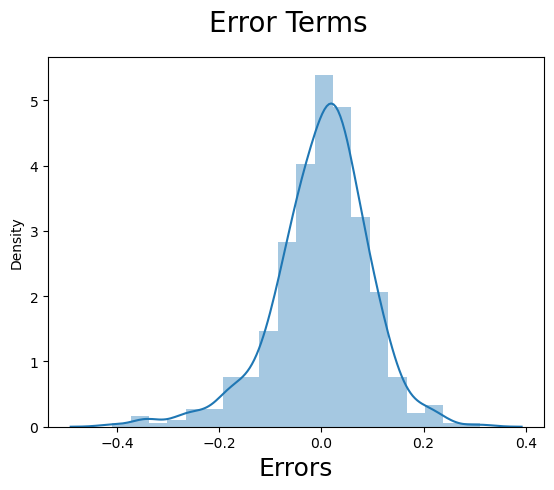

In [79]:
# 선형회귀모델의 예측 오차를 계산하고 이를 히스토그램으로 시각화 
res = y_train-y_train_pred # 예측 오차 계산
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# 실습(개념이해)2

### Insights
위의 히스토그램에서 잔차가 "정규분포"를 이루고 있음을 알 수 있습니다. 따라서 선형 회귀에 대한 가정은 유효합니다.

## X와 Y 사이에 선형 관계가 있다.

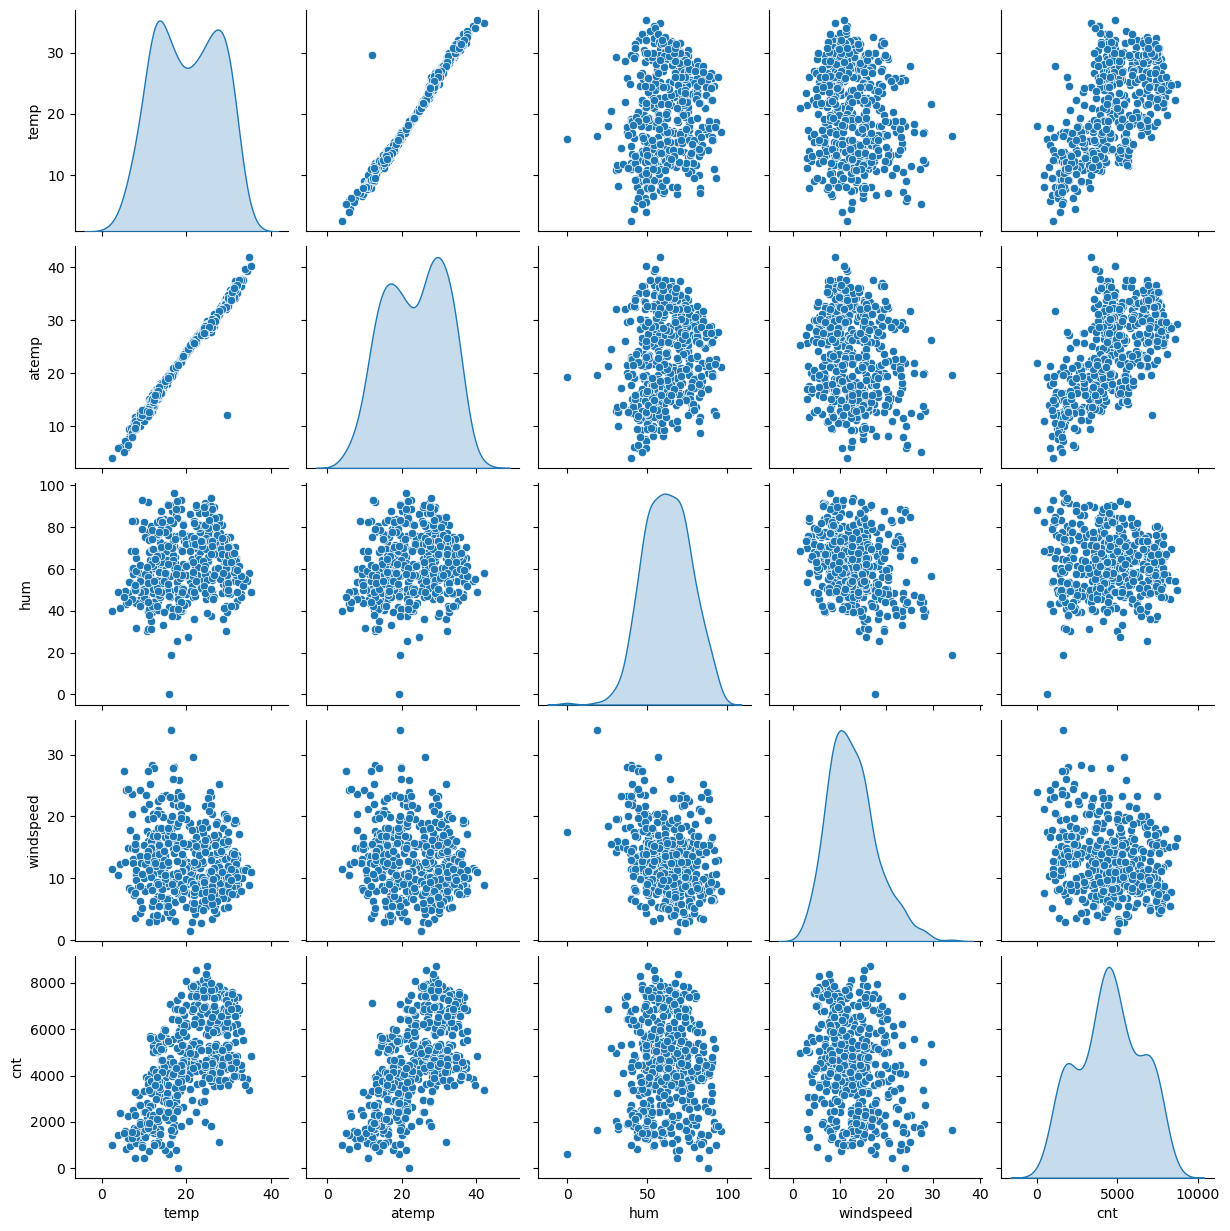

In [80]:
bike_new=bike_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

## Insight
-pair plot을 사용하면 temp와 atemp가 종속 변수 'cnt'와 선형 관계가 있음을 알 수 있습니다.

## 예측 변수 사이에 다중 공선성이 유무 파악

In [82]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.72
3,windspeed,4.02
1,workingday,4.01
0,yr,2.00
7,weekday_6,1.65
4,season_2,1.56
8,weathersit_2,1.52
5,season_4,1.38
6,mnth_9,1.20
9,weathersit_3,1.07


# 실습(개념이해)3

## Insight

- VIF 계산을 통해 예측 변수 사이에 다중공산성이 없다는 것을 알 수 있었습니다. 모든 값이 허용 범위인 5  미만이기 때문입니다

# 최종 모델을 사용한 예측

이제 모델을 적합시키고 가정을 확인했으므로, 최종 모델(lr6)을 사용하여 예측할 시간입니다

### test sets에 스케일링 적용


In [83]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.
# 수치형 변수 스케일링
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [84]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,...,0,0,0,0,0,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,1,0,...,0,0,0,0,0,0,0,1,0,0
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,0,1,...,0,0,0,0,0,0,0,0,0,0
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,1,0,...,0,0,0,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,1,0,1,0,0,0,0,1,0


In [85]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.684932,0.551225,0.527528,0.662567,0.346706,0.518889,0.264840,0.246575,...,0.073059,0.105023,0.155251,0.146119,0.118721,0.173516,0.132420,0.127854,0.324201,0.036530
std,0.501098,0.198967,0.465607,0.229463,0.215434,0.143562,0.159553,0.219953,0.442259,0.432005,...,0.260830,0.307285,0.362974,0.354034,0.324202,0.379560,0.339723,0.334692,0.469148,0.188034
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### X_test와 y_test로 구분

In [86]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null   

In [87]:
#  X_test에 대해 일련의 데이터 전처리 작업을 수행
# 테스트 데이터를 모델에 입력하기 전에 필요한 변환을 적용
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   windspeed     219 non-null    float64
 5   season_2      219 non-null    uint8  
 6   season_4      219 non-null    uint8  
 7   mnth_9        219 non-null    uint8  
 8   weekday_6     219 non-null    uint8  
 9   weathersit_2  219 non-null    uint8  
 10  weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [88]:
# Making predictions using the final model (lr6)
# 선형 회귀 모델인 lr6을 사용하여  X_test_lm6에 대한 예측을 수행하고,예측값을 y_pred 변수에 저장
y_pred = lr6.predict(X_test_lm6)

# 모델 평가

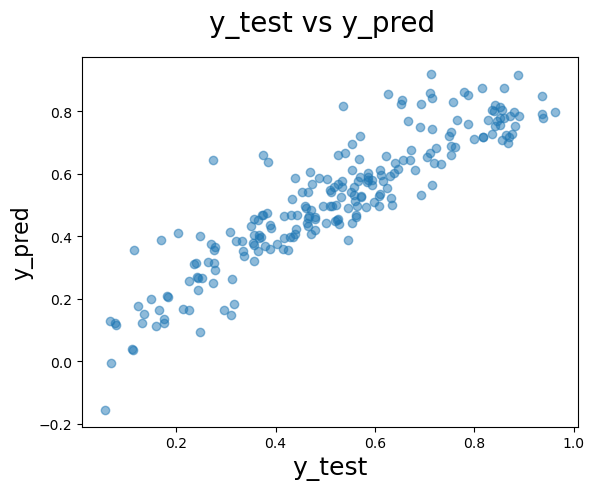

In [89]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

# 실습4

 ## TEST에 대한 R^2 값

In [90]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8203092200749708

## TEST에 대한 조정된 R^2 값

In [215]:
# We already have the value of R^2 (calculated in above step)

r2=0.8203092200749708

In [216]:
# Get the shape of X_test
X_test.shape


(219, 10)

In [217]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8116702402708829

# 최종 결과 비교


- Train R^2 :0.824
- Train Adjusted R^2 :0.821 
- Test R^2 :0.820
- Test Adjusted R^2 :0.812 
- 이것은 다양한 데이터 세트를 매우 잘 '일반화'할 수 있는 정말 좋은 모델인 것 같습니다.

# FINAL REPORT

최종 모델에 따르면, 자전거 예약에 영향을 미치는 상위 3개의 예측 변수는 다음과 같습니다.

- **온도(temp)** : A coefficient value of ‘0.5636’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.5636 units.

- **날씨 상황 3(weathersit_3)** : A coefficient value of ‘-0.3070’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.3070 units.

- **연도(yr)** : A coefficient value of ‘0.2308’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2308 units.

#### 따라서 최대 예약을 달성하기 위해 계획을 수립하는 동안 이러한 변수를 가장 중요하게 고려하는 것이 좋습니다

다음으로 고려할 수 있는 가장 좋은 기능은 다음과 같습니다
- **season_4:** : A coefficient value of ‘0.128744’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.128744 units.

- **풍속:** :  A coefficient value of ‘-0.155191’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.155191 units.

#### 참고:
 weathersit_1 & weathersit_3
- **weathersit_1:** 맑음, 구름 거의 없음, 부분적으로 흐림, 부분적으로 흐림
- **weathersit_3:** 가벼운 눈, 가벼운 비 + 천둥 폭풍 + 흩날리는 구름, 가벼운 비 + 흩날리는 구름


season1 & season4의 세부사항
- **season1:** 봄
- **season4:** 겨울